# Kaggle Competition:  Iceberg or Ship

# resnext50 architecture 

## increase epochs


---
## Import libraries

In [36]:
!ls -l

total 2716
-rw-rw-r-- 1 ubuntu ubuntu 625023 Jan 14 18:47 1_getdata.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 245619 Jan 14 18:36 2_model_resnet34.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  13445 Jan 14 18:36 3_model_resnext50.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  14220 Jan 13 21:14 4_model_nasnet.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  64965 Jan 14 19:40 4_resnext_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 147078 Jan 14 19:57 5_resnet18_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 138629 Jan 14 19:52 6_resnext50_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  49776 Jan 15 01:30 7_5_resnext50_more_epoch_update_sz.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 206248 Jan 15 01:31 7_resnext50_more_epoch.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 179449 Jan 14 21:28 7_resnext50_sz_100.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 159533 Jan 15 01:30 8_resnext50_more_epoch_sz300.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 137540 Jan 14 18:36 baseline.ipynb
-rw-rw-r-- 1 ubuntu ubuntu    536 Jan 14 18:36 helper.py
-rw-rw-r-- 1 ubuntu ubuntu 767392 Jan 14 18:36 other_groverpr.ipynb

In [37]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [38]:
from fastai.imports import *

In [39]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np
import shutil
from IPython.display import FileLink, FileLinks

from sklearn.model_selection import train_test_split
import helper

In [40]:
#PATH = "/home/nidhin/data/iceberg/"
PATH = os.path.expanduser("~/data/iceberg/")

In [41]:
!ls -l {PATH}

total 1973260
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan  9 00:38 models
-rw-rw-r--  1 ubuntu ubuntu     117951 Oct 23 17:27 sample_submission.csv
-rw-rw-r--  1 ubuntu ubuntu      38566 Jan  7 20:36 sample_submission.csv.7z
drwxrwxr-x  2 ubuntu ubuntu     274432 Jan 14 18:44 test
-rw-rw-r--  1 ubuntu ubuntu 1521771850 Oct 23 17:27 test.json
-rw-rw-r--  1 ubuntu ubuntu  257127394 Jan  7 20:36 test.json.7z
drwxrwxr-x 10 ubuntu ubuntu       4096 Jan 15 01:04 tmp
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 train
-rw-rw-r--  1 ubuntu ubuntu  196313674 Oct 23 17:23 train.json
-rw-rw-r--  1 ubuntu ubuntu   44932785 Jan  7 20:36 train.json.7z
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 valid


In [42]:
np.random.seed(0)

## Set Architecture

In [43]:
arch=resnext50
sz=150
bs=32
lr = 0.005

In [44]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.00)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

data = get_data(sz, bs)
data = data.resize(int(sz*1.3), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [45]:
#tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test',)

learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

### Learning Rate Finder

In [46]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 63%|██████▎   | 26/41 [00:00<00:00, 49.45it/s, loss=12.6] 


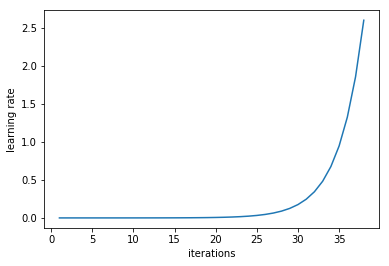

In [47]:
learn.sched.plot_lr()

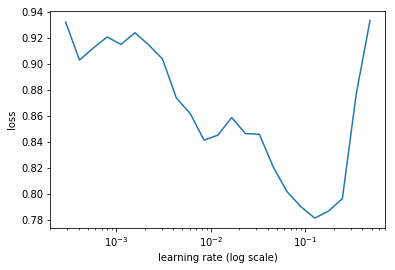

In [48]:
learn.sched.plot() 

In [49]:
learn.fit(lr, 10)
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

[0.      0.57287 0.34829 0.84091]                          
[1.      0.47014 0.29065 0.875  ]                          
[2.      0.46306 0.30295 0.87784]                          
[3.      0.40557 0.28736 0.87216]                          
[4.      0.40038 0.27163 0.875  ]                          
[5.      0.37548 0.28542 0.86364]                          
[6.      0.34352 0.27652 0.88352]                          
[7.      0.33688 0.27711 0.88068]                          
[8.      0.33155 0.27699 0.86932]                          
[9.      0.33102 0.29422 0.86648]                          



### Stochastic Gradient Descent with Restart

In [50]:
#learn.fit(lr, 4, cycle_len=2)
learn.fit(lr, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.54513 0.28379 0.86648]                          
[1.      0.4572  0.27839 0.88636]                          
[2.      0.41219 0.27955 0.89773]                          
[3.      0.43353 0.29683 0.86364]                          
[4.      0.4329  0.29051 0.87216]                          
[5.      0.42221 0.28305 0.875  ]                          
[6.      0.41527 0.29611 0.86648]                          
[7.      0.43743 0.28625 0.86364]                          
[8.      0.42604 0.28498 0.88352]                          
[9.      0.44338 0.28109 0.88068]                          
[10.       0.41329  0.28446  0.87784]                      
[11.       0.40828  0.28211  0.86932]                      
[12.       0.39784  0.27164  0.87784]                      
[13.       0.38189  0.27654  0.87784]                      
[14.       0.38852  0.2727   0.87784]                      
[15.       0.41554  0.2845   0.86648]                      
[16.       0.43568  0.28075  0.875  ]   

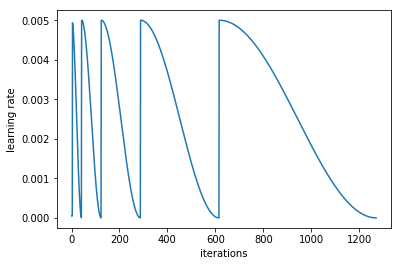

In [51]:
learn.sched.plot_lr()

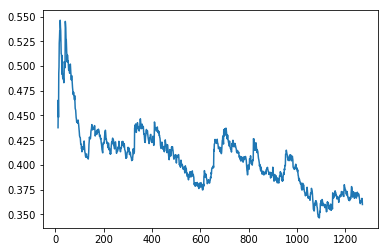

In [52]:
learn.sched.plot_loss()

In [53]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.28586956342000025, 0.8691588785046729)

### Unfreeze Layers

In [54]:
# unfreeze layers
learn.unfreeze()
#lrs = np.array([lr/15,lr/12,lr/9])
lrs = np.array([lr/9,lr/3,lr/1])

#wd = 0.025
#wds=[wd/100, wd/10, wd]
#wds=[0.0025,0.025,0.25]


### Run Learner Again

In [55]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2,use_wd_sched=True,wds=wds)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.53807 0.41887 0.71875]                          
[1.      0.49472 0.29159 0.87216]                          
[2.      0.42283 0.31259 0.83807]                          
[3.      0.39959 0.32258 0.84943]                          
[4.      0.38208 0.28328 0.86364]                          
[5.      0.38165 0.25929 0.88068]                          
[6.      0.34044 0.31344 0.85511]                          
[7.      0.37211 0.24899 0.88921]                          
[8.      0.33125 0.44354 0.81818]                          
[9.      0.29615 0.27662 0.88352]                          
[10.       0.28538  0.32928  0.875  ]                      
[11.       0.24391  0.26289  0.89204]                      
[12.       0.23319  0.25978  0.89773]                      
[13.       0.2272   0.28245  0.88636]                      
[14.       0.20979  0.27199  0.88636]                      
[15.       0.2319   0.46345  0.79546]                      
[16.       0.28758  0.31308  0.86364]   

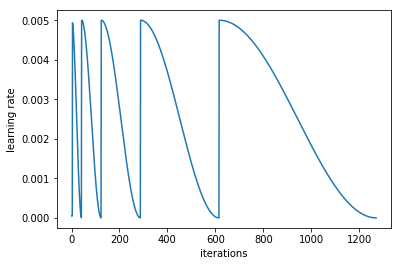

In [56]:
learn.sched.plot_lr()

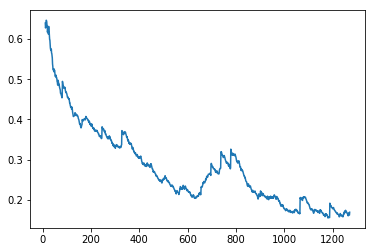

In [57]:
learn.sched.plot_loss()

In [58]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.2690163635546516, 0.8909657320872274)

In [63]:
learn.save('resnext50_sz150_zm13')

In [64]:
learn.load('resnext50_sz150_zm13')

In [65]:
helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz150_zm13.csv')

In [ ]:
# submission log loss
# submitted Jan 14, 9:30pm
# 0.2566

In [ ]:
# End here


### Run Learner again

In [30]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.20958 0.22138 0.90909]                          
[1.      0.20881 0.21258 0.90341]                          
[2.      0.19942 0.2125  0.90909]                          
[3.      0.19933 0.23313 0.89773]                          
[4.      0.19827 0.24482 0.90909]                          
[5.      0.18044 0.23777 0.90909]                          
[6.      0.20355 0.23141 0.91477]                          
[7.      0.19331 0.25434 0.90341]                          
[8.      0.16975 0.23403 0.90057]                          
[9.      0.17037 0.24765 0.89489]                          
[10.       0.16388  0.25717  0.90057]                      
[11.       0.1503   0.24492  0.89773]                      
[12.       0.13647  0.25068  0.90625]                      
[13.       0.15974  0.28722  0.91193]                      
[14.       0.17652  0.26302  0.90909]                      
[15.       0.19685  0.25512  0.90909]                      
[16.       0.17593  0.29663  0.90057]   

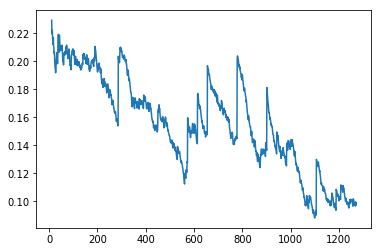

In [31]:
learn.sched.plot_loss()

In [ ]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

### Run Learner again

In [32]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.06747 0.27543 0.90909]                           
[1.      0.13168 0.36439 0.90341]                           
[2.      0.16096 0.26995 0.92329]                          
[3.      0.23736 0.33589 0.88068]                          
[4.      0.22001 0.1987  0.92046]                          
[5.      0.15744 0.22887 0.91477]                          
[6.      0.12595 0.21722 0.91761]                          
[7.      0.12573 0.27703 0.88921]                          
[8.      0.11847 0.31128 0.89489]                          
[9.      0.11071 0.29136 0.89489]                          
[10.       0.15551  0.29155  0.90625]                       
[11.       0.11461  0.2512   0.90057]                      
[12.       0.15903  0.26684  0.90341]                      
[13.       0.10583  0.281    0.90057]                      
[14.       0.10634  0.26464  0.90909]                       
[15.       0.14829  0.32006  0.88068]                      
[16.       0.21266  0.22886  0.89489

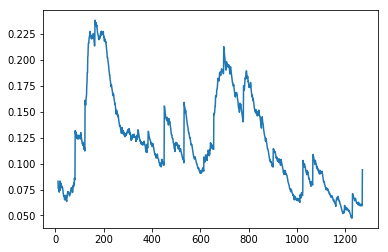

In [33]:
learn.sched.plot_loss()

## Log Loss | Accuracy (final model here)

In [34]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.24686469631131677, 0.9158878504672897)

## Save predictions

In [35]:
# test_df = pd.read_json(PATH+"/test.json")
# helper.make_test_file(log_preds,test_df,model_name='resnext50_sz75_zm15_bs32_comp_band',
#                       classes=data.classes,
#                       submission_folder =f'{PATH}sub'
#                      )